# Exercise 5: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
      - elizerimage1.jpg
      ...
    - Eliza
      - elizaimage1.jpg
      ...
    - Elijah
      - elijahimage1.jpg
      ...
  - Test
    - testimage1.jpg
    ...
```

- Upload 190 images of your self (selfied are recommended) in the Train folder
- Upload 190 images of your partner in the Train folder
- Upload 10 images each of yourself and your partner in the Test Folder (30 images total for each member)
- Use **.png** or **.jpg** or **.jpeg** images files

In [26]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [2]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

## Mount Google Drive

In [36]:
from google.colab import drive
drive.mount('/content/drive')

BASE_PATH = '/content/drive/My Drive/Images'
TRAIN_PATH = os.path.join(BASE_PATH, 'Train')
TEST_PATH = os.path.join(BASE_PATH, 'Test')

PERSON1 = 'Jude'
PERSON2 = 'Lawrence'
PERSON3 = 'Lovely'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Display one raw image directly from your drive

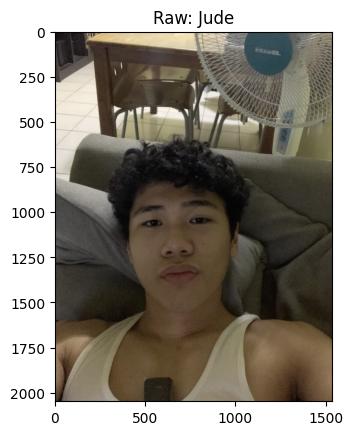

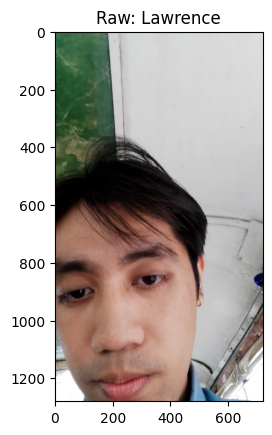

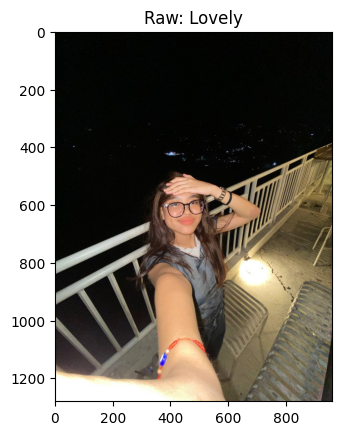

In [38]:
def displayImage(image_path, title=""):
  # Path to your image file in Google Drive
  image = Image.open(image_path)

  # Display the image using matplotlib
  plt.imshow(image)
  plt.title(title)
  plt.axis('on')  # Hide axes for cleaner display
  plt.show()

for person in [PERSON1, PERSON2, PERSON3]:
    folder = os.path.join(TRAIN_PATH, person)
    if os.path.exists(folder):
        files = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if files:
            img_path = os.path.join(folder, files[0])
            displayImage(img_path, title=f"Raw: {person}")
        else:
            print(f" No images found in {folder}")
    else:
        print(f" Folder not found: {folder}")

## 2. Load the images from your drive and apply preprocessing to your raw images

In [40]:
def load_images_from_folder(train_path, person1, person2, person3):
    images = []
    labels = []

    for person in [person1, person2, person3]:
        folder = os.path.join(train_path, person)
        if not os.path.isdir(folder):
            print(f"Folder missing: {folder}")
            continue
        print(f"Loading images from: {person}")
        for filename in os.listdir(folder):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(folder, filename)
                img = cv2.imread(img_path)
                if img is None:
                    continue
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (100, 100))
                images.append(img.flatten())
                labels.append(person)
    return np.array(images), np.array(labels)

images, labels = load_images_from_folder(TRAIN_PATH, PERSON1, PERSON2, PERSON3)
print(f"\n2. Loaded {len(images)} images. Shape: {images.shape}")

Loading images from: Jude
Loading images from: Lawrence
Loading images from: Lovely

2. Loaded 570 images. Shape: (570, 10000)


## 3. Display one pre-processed image from the training set

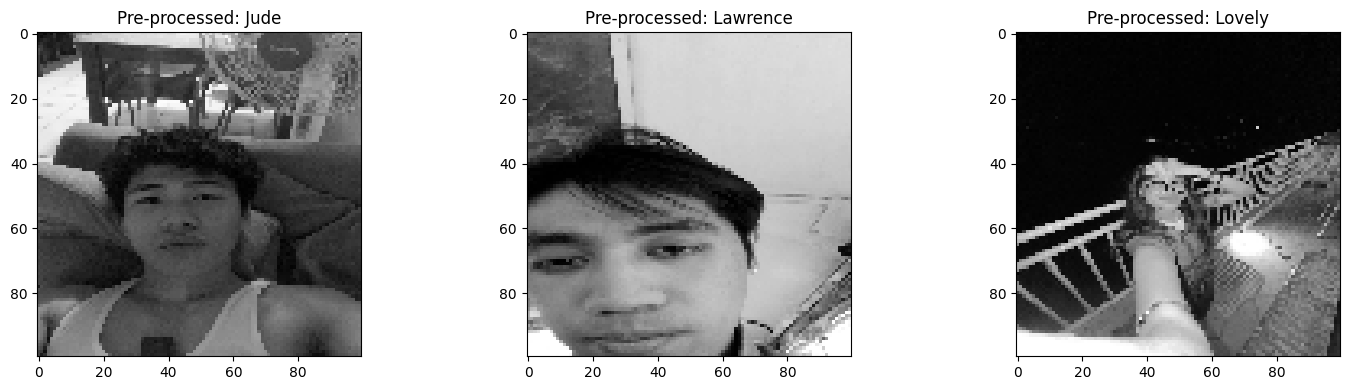

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) # Changed from 1, 2 to 1, 3
for i, person in enumerate([PERSON1, PERSON2, PERSON3]):
    indices = np.where(labels == person)[0]
    if len(indices) > 0:
        img = images[indices[0]].reshape(100, 100)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Pre-processed: {person}")
        axes[i].axis('on')
    else:
        axes[i].text(0.5, 0.5, f"No image\nfor {person}", ha='center', va='center')
        axes[i].axis('off')

plt.tight_layout()
plt.show()

## 4. Display ten pre-processed images from the training set

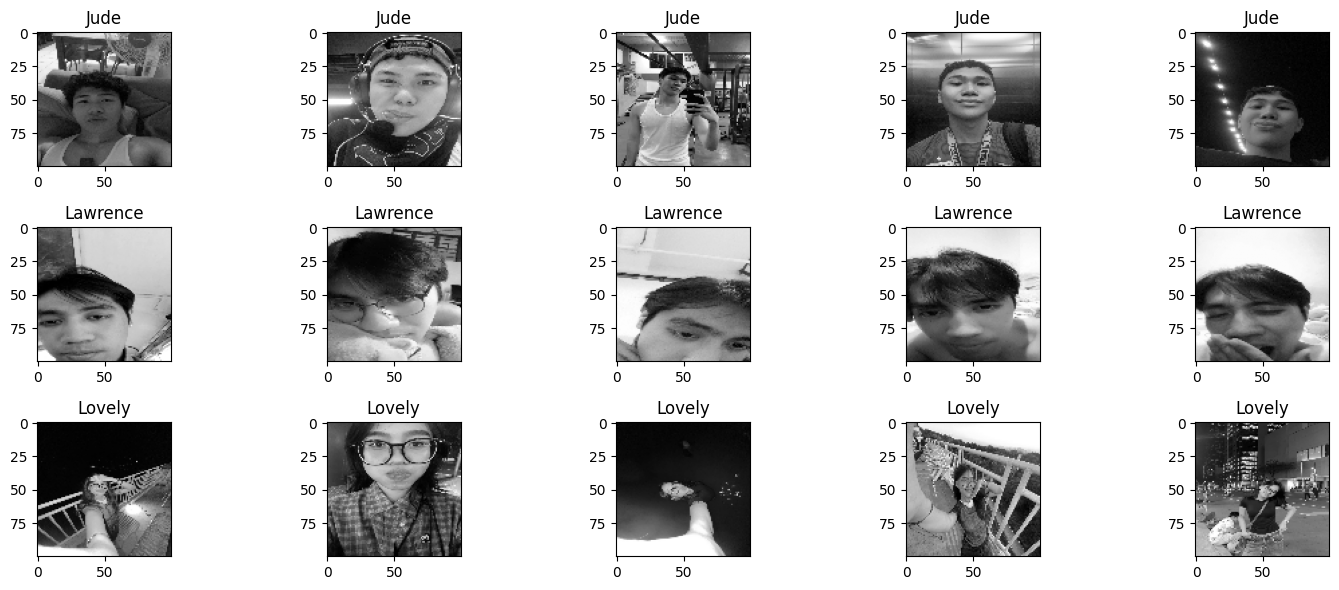

In [47]:
selected_images = []
selected_labels = []

for person in [PERSON1, PERSON2, PERSON3]:
    indices = np.where(labels == person)[0]
    selected_indices = indices[:5]
    for idx in selected_indices:
        selected_images.append(images[idx])
        selected_labels.append(labels[idx])

num_to_show = min(15, len(selected_images))
fig, axes = plt.subplots(3, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(num_to_show):
    axes[i].imshow(selected_images[i].reshape(100, 100), cmap='gray')
    axes[i].set_title(selected_labels[i])
    axes[i].axis('on')

for j in range(num_to_show, 10):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## 5. Split your training data

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## 6. Train your SVM model

In [49]:
from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)

SVC()

## 7. Evaluate your SVM model

In [50]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 84.21%


## 8. Test your model using images not in your training set

Use your SVM model to predict the label of all of your images in the Test folder

In [54]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

   • lawrenceimage1.jpg → ['Lovely']


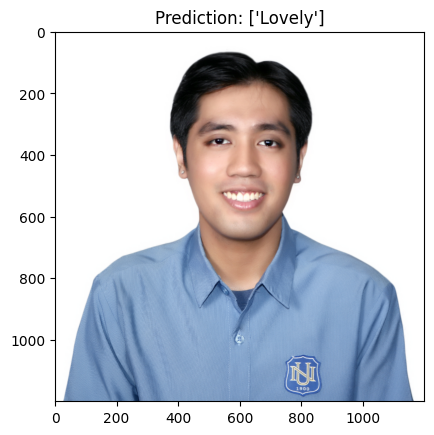

   • lawrenceimage10.jpg → ['Lawrence']


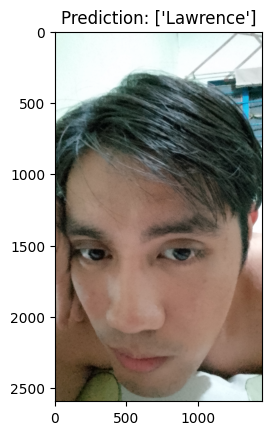

   • lawrenceimage2.png → ['Lovely']


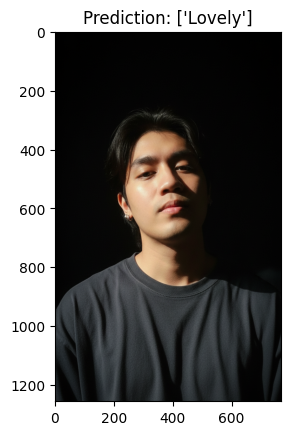

   • lawrenceimage3.png → ['Lovely']


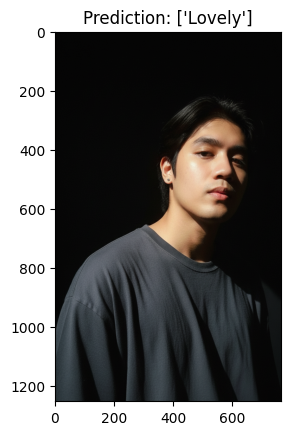

   • lawrenceimage4.png → ['Lovely']


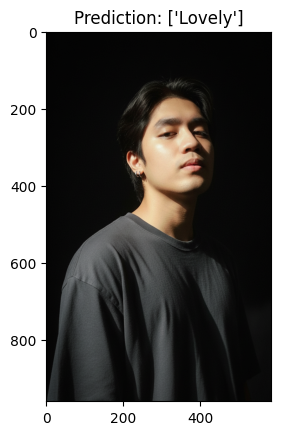

   • lawrenceimage5.jpg → ['Lovely']


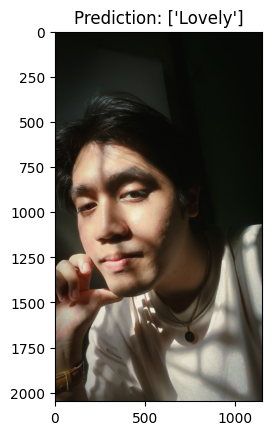

   • lawrenceimage6.png → ['Jude']


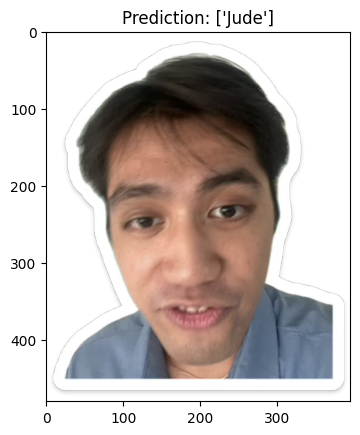

   • lawrenceimage7.jpg → ['Jude']


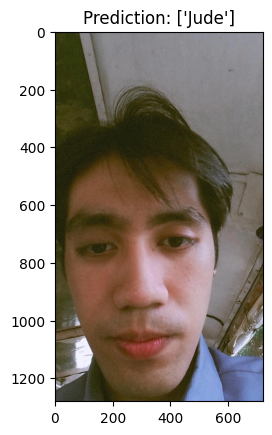

   • lawrenceimage8.jpeg → ['Jude']


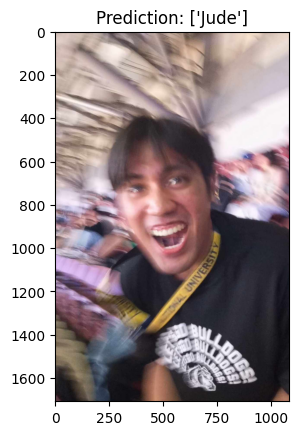

   • lawrenceimage9.jpeg → ['Jude']


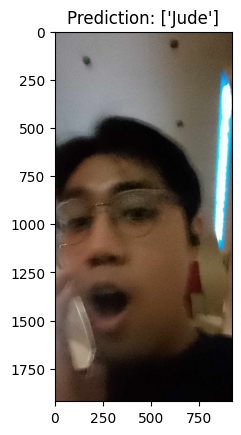

   • lovelyimage1.jpg → ['Lovely']


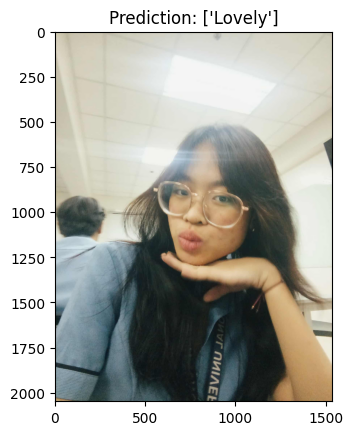

   • lovelyimage10.jpg → ['Lovely']


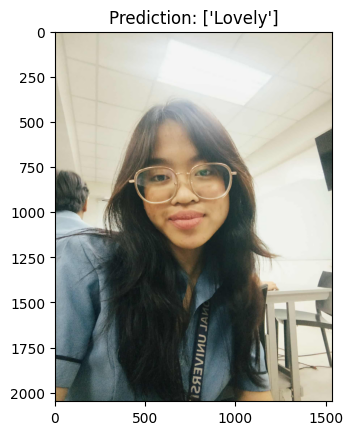

   • lovelyimage2.jpg → ['Jude']


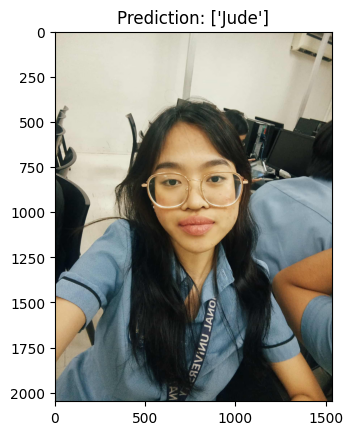

   • lovelyimage3.jpg → ['Jude']


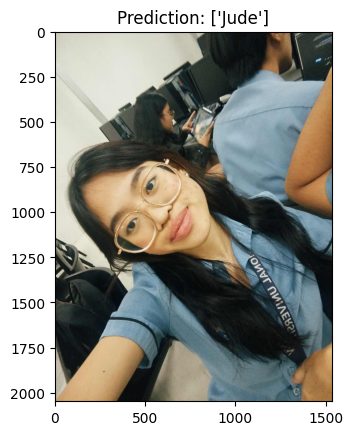

   • lovelyimage4.jpg → ['Jude']


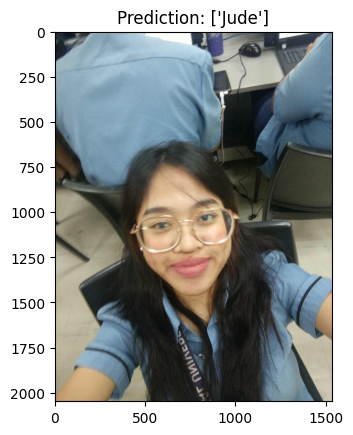

   • lovelyimage5.jpg → ['Lovely']


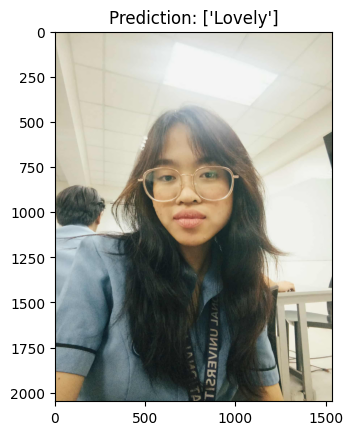

   • lovelyimage6.jpg → ['Lovely']


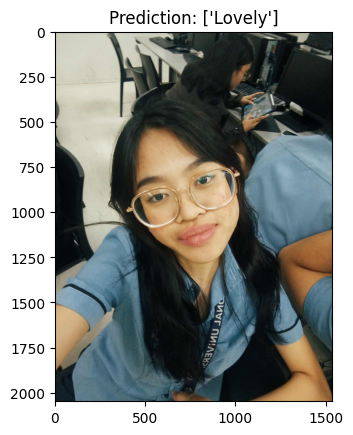

   • lovelyimage7.jpg → ['Lovely']


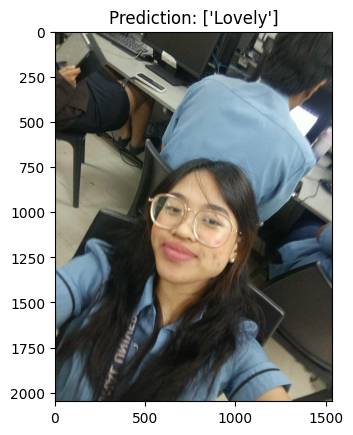

   • lovelyimage8.jpg → ['Lovely']


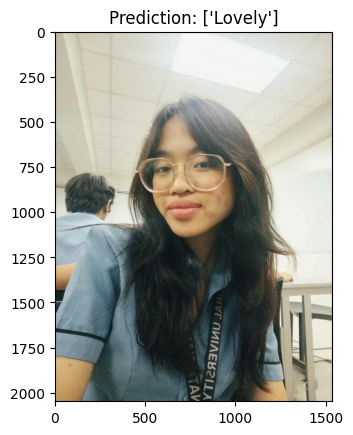

   • lovelyimage9.jpg → ['Jude']


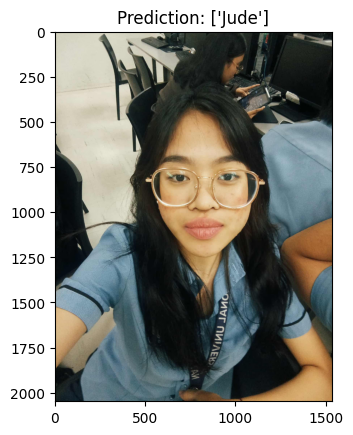

   • prodigalidadimage1.jpeg → ['Lawrence']


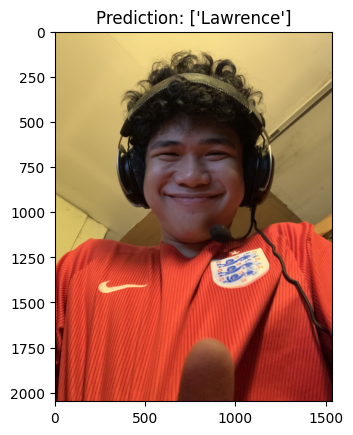

   • prodigalidadimage10.jpeg → ['Jude']


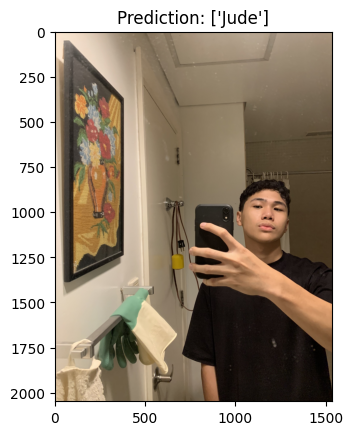

   • prodigalidadimage2.jpeg → ['Jude']


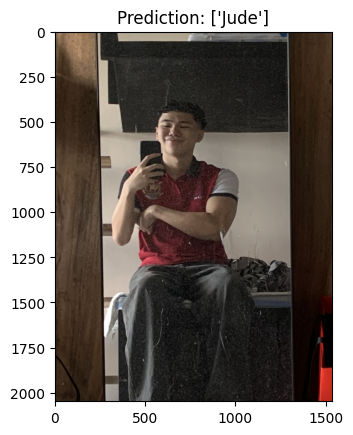

   • prodigalidadimage3.jpeg → ['Jude']


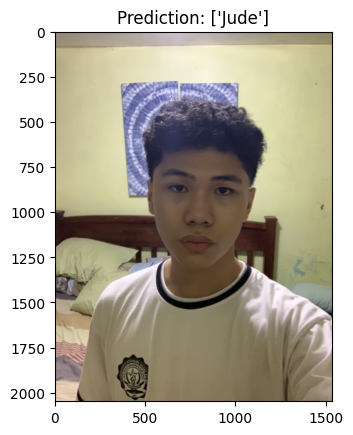

   • prodigalidadimage4.jpeg → ['Jude']


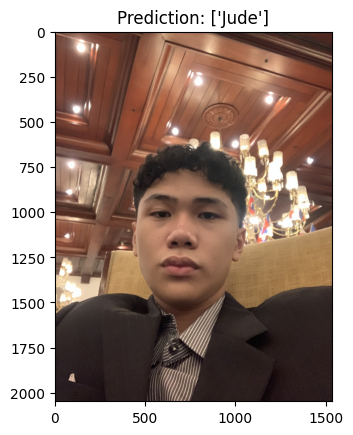

   • prodigalidadimage5.jpeg → ['Jude']


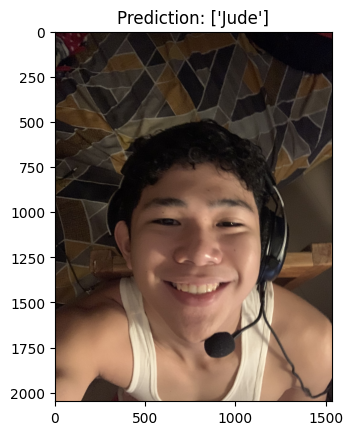

   • prodigalidadimage6.jpeg → ['Jude']


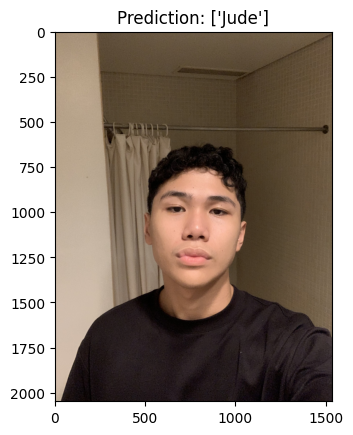

   • prodigalidadimage7.jpeg → ['Jude']


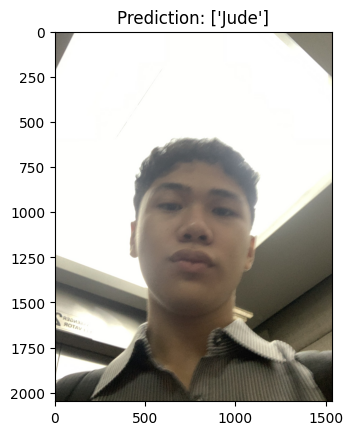

   • prodigalidadimage8.jpeg → ['Jude']


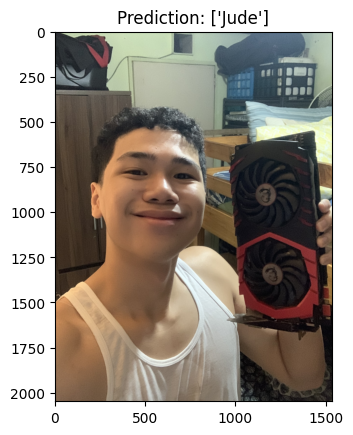

   • prodigalidadimage9.jpeg → ['Jude']


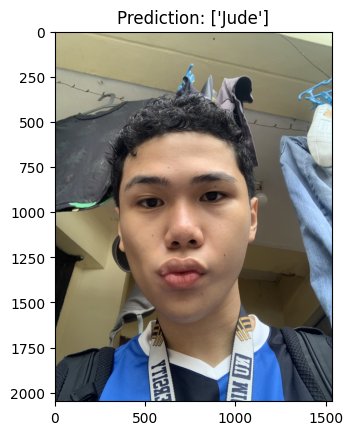

In [56]:
all_test_images = []
for root, dirs, files in os.walk(TEST_PATH):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            all_test_images.append(os.path.join(root, file))

if all_test_images:
    for img_path in sorted(all_test_images):
        pred = predict_image(img_path, model)
        filename = os.path.basename(img_path)
        print(f"   • {filename} → {pred}")
        displayImage(img_path, title=f"Prediction: {pred}")